In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False  
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")

In [28]:
data = pd.read_excel('Catamarans_coastline_avg_Numerical.xlsx',index_col=0)
del data['Make']
del data['Geographic Region']
del data['Year']
del data['GDP per capita (USD)']
data.head()

,Variant,Length \n(ft),Country/Region/State,Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average Cargo Throughput (tons),GDP (USD),Engine Hours,coastline(km),Listing Price (USD)
0,4,38.0,8,21.50,3.75,16093,753,240000000,1000.0,15,0.0,219000.0
1,67,39.0,20,21.08,3.67,19800,958,270000000,1150.0,15,9330.0,210000.0
2,14,39.0,24,22.08,4.08,22046,1033,76000000,66.8,15,2490.0,200000.0
3,14,39.5,5,22.08,4.17,19621,1087,595000,57.8,15,5835.0,188252.0
4,14,39.5,5,22.08,4.17,19621,1087,595000,57.8,15,5835.0,188131.0


In [29]:

# 特征数据和标签数据拆分，y为标签数据，除y之外的为特征数据；
Y = data['Listing Price (USD)']
X =  data.drop(columns=['Listing Price (USD)'])


In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)
# 不缩放、鲁棒性

In [31]:
# n_estimators = np.arange(95,105, step=2) 
# max_features = ["sqrt", "log2"] 
# # "auto",
# max_depth = list(np.arange(35, 37, step=1)) + [None] 
# min_samples_split = np.arange(1,20, step=2) 
# min_samples_leaf = [1, 2] 
# bootstrap = [True, False] 

# param_grid = { 
#     "n_estimators": n_estimators, 
#     "max_features": max_features, 
#     "max_depth": max_depth, 
#     # "min_samples_split": min_samples_split, 
#     "min_samples_leaf": min_samples_leaf, 
#     # "bootstrap": bootstrap, 
# } 

In [32]:
forest_best = RandomForestRegressor(
    n_estimators=160,
    # criterion='mse',
    max_depth=175,
    min_samples_split=10
    # min_samples_leaf=1,

    )
forest_best.fit(x_train, y_train)

score = forest_best.score(x_test, y_test)
print('随机森林模型得分： ', score)


随机森林模型得分：  0.7838206187305059


In [33]:
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np

In [45]:
x_test.describe()

,Variant,Length \n(ft),Country/Region/State,Beam (ft),Draft (ft),Displacement (lbs),Sail Area (sq ft),Average Cargo Throughput (tons),GDP (USD),Engine Hours,coastline(km)
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01,95.000000,95.000000,95.000000
mean,34.968421,43.398947,14.168421,24.129895,4.236211,32441.610526,1291.063158,5.030084e+07,966.269474,6.294737,6113.326316
std,20.642062,4.004319,9.234133,1.378081,0.419377,10242.766631,263.860529,7.923906e+07,988.231087,4.279774,4913.872929
min,7.000000,38.000000,0.000000,20.580000,2.920000,16500.000000,764.000000,2.350000e+05,16.900000,1.000000,0.000000
25%,16.000000,39.500000,8.000000,22.895000,4.040000,24250.000000,1076.000000,1.078000e+07,209.000000,3.000000,1793.000000
50%,32.000000,43.000000,12.000000,24.330000,4.170000,29762.000000,1237.000000,2.029000e+07,851.000000,5.000000,4964.000000
75%,44.500000,45.800000,17.500000,25.090000,4.300000,37479.000000,1506.000000,5.178000e+07,1394.000000,10.000000,9330.000000
max,79.000000,56.000000,36.000000,27.080000,5.920000,52359.000000,2102.000000,2.700000e+08,3861.000000,15.000000,13676.000000


In [58]:


feature_list =['n_estimateors','max_depth','min_samples_split']
problem = {
    'num_vars':3,
    'names':feature_list,
    'bounds':[[166,183],
             [171,181],
             [10,50]
             ]
}


In [59]:
param_values = saltelli.sample(problem, 1000)

In [61]:
Y = RandomForestRegressor(param_values)

In [62]:
print(param_values.shape, Y.shape)

AttributeError: 'RandomForestRegressor' object has no attribute 'shape'

In [63]:
Si = sobol.analyze(problem, Y, print_to_console=True)

AttributeError: 'RandomForestRegressor' object has no attribute 'size'

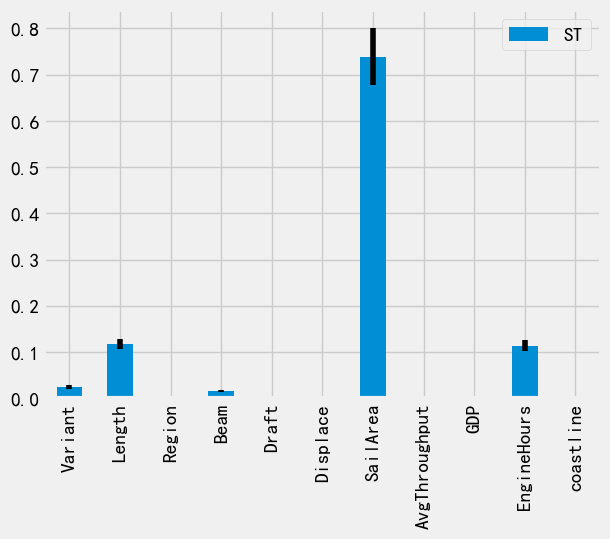

In [57]:
from SALib.plotting.bar import plot as barplot
import matplotlib.pyplot as plot

Si_df = Si.to_df()
barplot(Si_df[0])
plot.show()

In [ ]:
Si = sobol.analyze(problem,y_test,print_to_console=True)


RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

In [ ]:
# pre = forest_best.predict(x_test)
# x = list(range(1,49))

# y_test=y_test[0:48]
# pre=pre[0:48]

# plt.figure(figsize=(25, 8), dpi=80)
 
# # 绘制图像 label 设置标签 color设置颜色 linestyle 设置线条 linewidth 设置线条粗细 alpha设置透明度
# plt.plot(x, y_test,label=u'origin', color='red', linestyle='-', marker='.', markersize=5)
# plt.plot(x, pre,label=u'predict', color='blue',linestyle='-', marker='.', markersize=5)


# # 设置X刻度
# _xtick_labels = list(range(1,49))
# plt.xticks(x, _xtick_labels, rotation=45)

# plt.xlabel('number')
# plt.ylabel('Listing Price(USD)')
# plt.title('predict-origin')
 
# plt.legend(['origin_ListingPrice','pre_ListingPrice'])
# plt.show()


In [ ]:
param_grid = {
    # 'n_estimators':range(1,170,10),
    # 'criterion':['mse'],
    # 'max_depth':range(170,180,4),
    # 'min_samples_split':range(10,12,1),
    # 'min_samples_leaf':[1]
}
#     n_estimators=160,
#     # criterion='mse',
#     max_depth=175,
#     min_samples_split=10
#     # min_samples_leaf=1,

In [ ]:
# forest = RandomForestRegressor(random_state=7,n_jobs=-1)
# RFC_cv = GridSearchCV(forest, param_grid, cv=3, scoring="neg_log_loss")
# # , n_iter=100, n_jobs=-1
# RFC_cv.fit(x_train,y_train)
# print(RFC_cv.cv_results_[ 'mean_test_score'])
# print(RFC_cv.cv_results_)
# print('RFC最优模型参数：',RFC_cv.best_params_)
# # random_cv.best_params_
# # grid_cv_best = random_cv.best_estimator_

# forest_best=RFC_cv.best_estimator_


[nan]
{'mean_fit_time': array([0.13333249]), 'std_fit_time': array([0.00660111]), 'mean_score_time': array([0.00099929]), 'std_score_time': array([4.80925728e-06]), 'params': [{}], 'split0_test_score': array([nan]), 'split1_test_score': array([nan]), 'split2_test_score': array([nan]), 'mean_test_score': array([nan]), 'std_test_score': array([nan]), 'rank_test_score': array([1])}
RFC最优模型参数： {}


Text(0.5, 1.0, 'Feature variable weights')

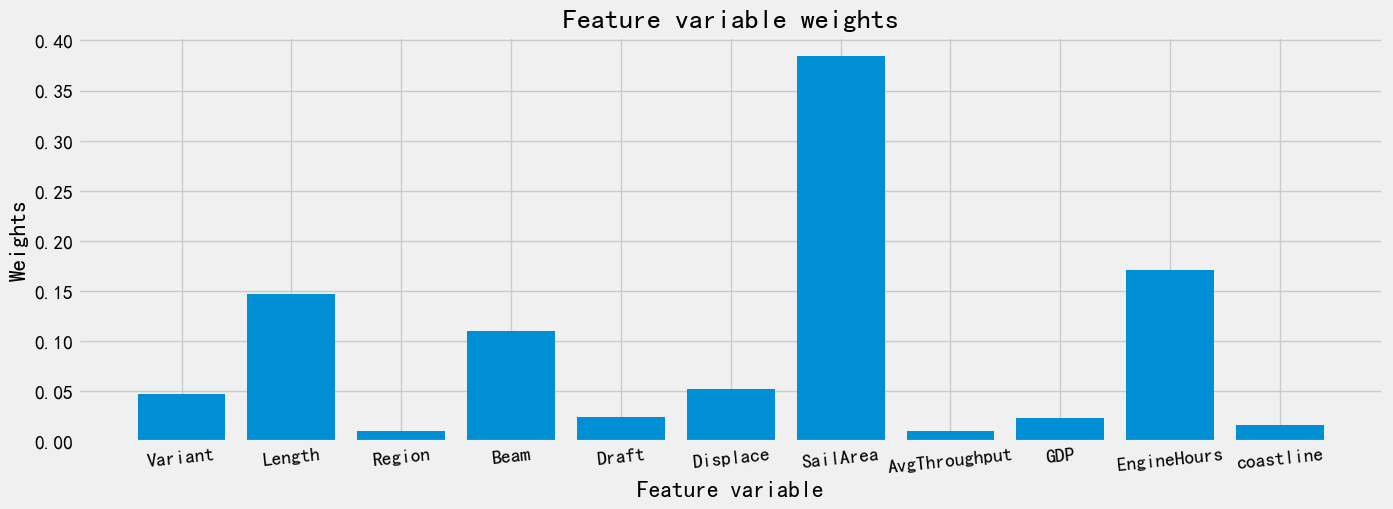

In [ ]:
# importances = list(forest_best.feature_importances_)
# feature_list =['Variant','Length','Region','Beam','Draft','Displace','SailArea','AvgThroughput','GDP','EngineHours','coastline']
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

# import matplotlib.pyplot as plt
 
# x_values = list(range(len(importances)))
# plt.figure(figsize=(15, 5))
# plt.bar(x_values, importances, orientation='vertical')
# plt.xticks(x_values, feature_list, rotation=6)
# plt.ylabel('Weights')
# plt.xlabel('Feature variable')
# plt.title('Feature variable weights')


In [ ]:
# y_pred =forest_best.predict(x_test)
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_pred, y_test))

# # photo y_pred & y_test
# print(forest_best.score(x_test,y_test))
# #score

Mean Absolute Error: 64598.00786090284
0.7696976655100991


In [ ]:
# from sklearn.tree import export_graphviz
# import os

# for index, Tree_estimator in enumerate(forest_best):
#     if index>=1 : break
#     export_graphviz(Tree_estimator,
#                     out_file='tree{}.dot'.format(index),
#                     feature_names=feature_list,
#                     rounded=True,
#                     proportion=False,
#                     precision=2,
#                     filled=True)
#     os.system('dot -Tpng tree{}.dot -o tree{}.png'.format(index, index))



In [ ]:
# from six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# #这个到时候使用graphviz库
# import pydotplus
# import os
# # os.environ['PATH'] = os.environ['PATH']+';'+r"D:\CLibrary\Graphviz2.44.1\bin\graphviz"
# dot_data = StringIO()
# export_graphviz(pipe.named_steps['regressor'].estimators_[0],
#                 out_file=dot_data)
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('tree.png')
# Image(graph.create_png())


In [ ]:
#graphviz

In [ ]:
# data = pd.read_excel('香港(3).xlsx',index_col=0,sheet_name=1)

# del data['Make']
# del data['Geographic Region']
# del data['Year']
# del data['GDP per capita (USD)']
# # 特征数据和标签数据拆分，y为标签数据，除y之外的为特征数据；
# Y = data['Listing Price (USD)']
# X =  data.drop(columns=['Listing Price (USD)'])
# list(Y)

[685000, 560000, 538500]

In [ ]:
# score = forest_best.predict(X)
# score

array([533646.92529906, 539753.27718779, 534784.87629455])